# Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Cargando Data del CSV


In [2]:
file_path = "../data/housing.csv"

In [3]:
data = pd.read_csv(file_path)
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
df = data.rename(columns={
    'longitude':'longitud',
    'latitude':'latitud',
    'housing_median_age': 'edad_mediana_vivienda',
    'total_rooms': 'total_habitaciones',
    'total_bedrooms': 'total_dormitorios',
    'population': 'poblacion',
    'households': 'hogares',
    'median_income': 'ingreso_mediano',
    'median_house_value': 'valor_mediano_vivienda',
    'ocean_proximity': 'proximidad_oceano'
})
df

,longitud,latitud,edad_mediana_vivienda,total_habitaciones,total_dormitorios,poblacion,hogares,ingreso_mediano,valor_mediano_vivienda,proximidad_oceano
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
df.columns

Index(['longitud', 'latitud', 'edad_mediana_vivienda', 'total_habitaciones',
       'total_dormitorios', 'poblacion', 'hogares', 'ingreso_mediano',
       'valor_mediano_vivienda', 'proximidad_oceano'],
      dtype='object')

In [6]:
df.head(10)

,longitud,latitud,edad_mediana_vivienda,total_habitaciones,total_dormitorios,poblacion,hogares,ingreso_mediano,valor_mediano_vivienda,proximidad_oceano
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   longitud                20640 non-null  float64
 1   latitud                 20640 non-null  float64
 2   edad_mediana_vivienda   20640 non-null  float64
 3   total_habitaciones      20640 non-null  float64
 4   total_dormitorios       20433 non-null  float64
 5   poblacion               20640 non-null  float64
 6   hogares                 20640 non-null  float64
 7   ingreso_mediano         20640 non-null  float64
 8   valor_mediano_vivienda  20640 non-null  float64
 9   proximidad_oceano       20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
df['proximidad_oceano'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

# Data Faltante

In [9]:
# Ver si hay valores faltantes
valores_faltantes = df.isnull().sum()
# Calcular el porcentaje de la data q falta por columna
porcentaje_faltante = (valores_faltantes/len(df))*100

print(f"Valores faltantes por columna:\n{valores_faltantes}")
print(f"\nPorcentaje faltante por columna:\n{porcentaje_faltante}")

Valores faltantes por columna:
longitud                    0
latitud                     0
edad_mediana_vivienda       0
total_habitaciones          0
total_dormitorios         207
poblacion                   0
hogares                     0
ingreso_mediano             0
valor_mediano_vivienda      0
proximidad_oceano           0
dtype: int64

Porcentaje faltante por columna:
longitud                  0.000000
latitud                   0.000000
edad_mediana_vivienda     0.000000
total_habitaciones        0.000000
total_dormitorios         1.002907
poblacion                 0.000000
hogares                   0.000000
ingreso_mediano           0.000000
valor_mediano_vivienda    0.000000
proximidad_oceano         0.000000
dtype: float64


In [10]:
# Eliminamos filas con la data faltante
data_limpia = df.dropna()

# Verificamos que han sido eliminadas correctamente
print("\nValores faltantes despues de dropna: ")
print(data_limpia.isnull().sum())


Valores faltantes despues de dropna: 
longitud                  0
latitud                   0
edad_mediana_vivienda     0
total_habitaciones        0
total_dormitorios         0
poblacion                 0
hogares                   0
ingreso_mediano           0
valor_mediano_vivienda    0
proximidad_oceano         0
dtype: int64


# Exploracion de la Data y Visualizacion


In [11]:
df.describe()

,longitud,latitud,edad_mediana_vivienda,total_habitaciones,total_dormitorios,poblacion,hogares,ingreso_mediano,valor_mediano_vivienda
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


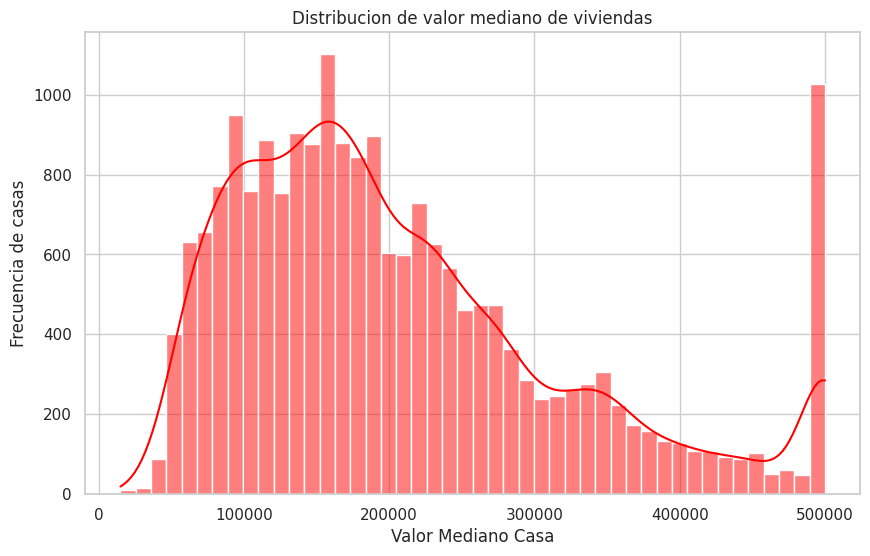

In [12]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(data_limpia["valor_mediano_vivienda"], color="red", kde=True)
plt.title("Distribucion de valor mediano de viviendas")
plt.xlabel('Valor Mediano Casa')
plt.ylabel('Frecuencia de casas')

plt.show()

# Eliminacion de Valores Atipicos 

In [13]:
Q1 = data_limpia['valor_mediano_vivienda'].quantile(0.25)
print(Q1)

Q3 = data_limpia['valor_mediano_vivienda'].quantile(0.75)
print(Q3)

IQR = Q3-Q1 #Que tan disperso esta mi 50%

limite_inferior = Q1 - 1.5 * IQR # Valor debajo de sera un valor Atipico
limite_superior =  Q3 + 1.5 * IQR # Vaor encima de sera un valor Atipico

print(limite_inferior)
print(limite_superior)

data_no_atipicos = data_limpia[(data_limpia['valor_mediano_vivienda'] >= limite_inferior) & (data_limpia['valor_mediano_vivienda']<= limite_superior)]

print(f"Data original tamaño: {data_limpia.shape}")
print(f"Nueva Data: {data_no_atipicos.shape}")




119500.0
264700.0
-98300.0
482500.0
Data original tamaño: (20433, 10)
Nueva Data: (19369, 10)


# Grafico para los Valores Atipicos

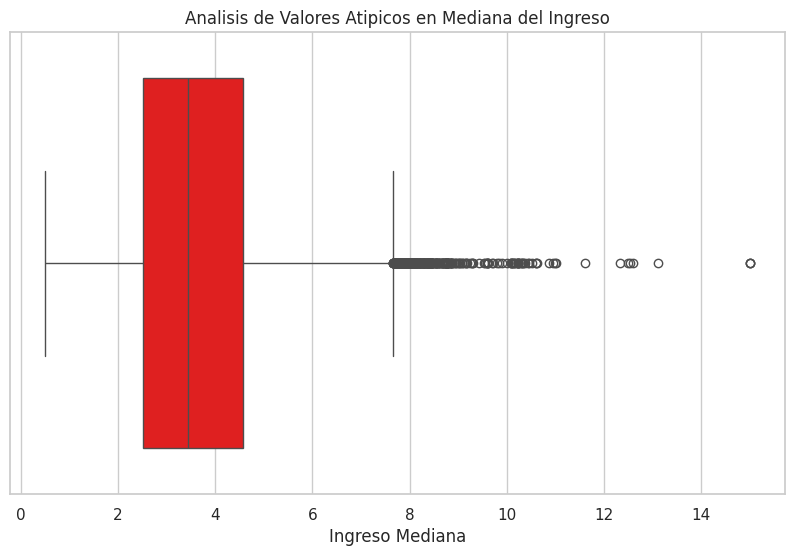

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_no_atipicos['ingreso_mediano'], color='red')
plt.title('Analisis de Valores Atipicos en Mediana del Ingreso')
plt.xlabel('Ingreso Mediana')
plt.show()

In [15]:
# Calculate Q1 and Q3
Q1 = data_no_atipicos['ingreso_mediano'].quantile(0.25)
Q3 = data_no_atipicos['ingreso_mediano'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_atipico_new = data_no_atipicos[(data_no_atipicos['ingreso_mediano'] >= lower_bound) & (data_no_atipicos['ingreso_mediano'] <= upper_bound)]

# Check the shape of the data before and after the removal of outliers
print("Tamaño data Original:", data_no_atipicos.shape)
print("Tamaño sin datos atipicos:", data_no_atipico_new.shape)

Tamaño data Original: (19369, 10)
Tamaño sin datos atipicos: (19026, 10)


In [16]:
df= data_no_atipico_new

# Matriz de Correlacion

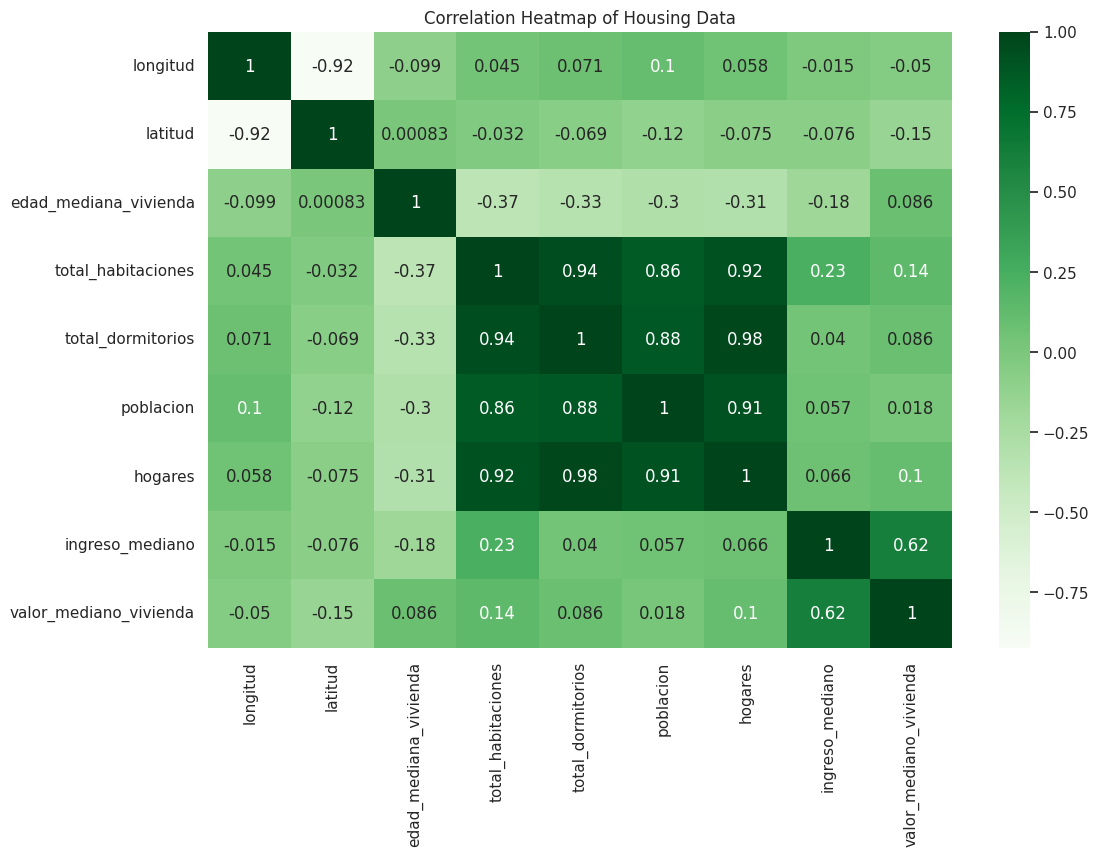

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.iloc[:,:-1].corr(), annot=True, cmap='Greens')
plt.title('Correlation Heatmap of Housing Data')
plt.show()


In [ ]:
df = df.drop('total_dormitorios',axis = 1)
df.to_csv('casas.csv', index=False)
df.columns

Index(['longitud', 'latitud', 'edad_mediana_vivienda', 'total_habitaciones',
       'poblacion', 'hogares', 'ingreso_mediano', 'valor_mediano_vivienda',
       'proximidad_oceano'],
      dtype='object')

In [19]:
# Unique value count for categorical data
for column in ['proximidad_oceano']:  # Add other categorical columns if any
    print(f"Unique values in {column}:", df[column].unique())

Unique values in proximidad_oceano: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


# Categorizacion de las Cadenas

In [20]:
ocean_proximity_dummies = pd.get_dummies(df['proximidad_oceano'], prefix='proximidad_oceano',dtype=int)
df = pd.concat([df.drop("proximidad_oceano", axis =1), ocean_proximity_dummies], axis=1)
ocean_proximity_dummies


,proximidad_oceano_<1H OCEAN,proximidad_oceano_INLAND,proximidad_oceano_ISLAND,proximidad_oceano_NEAR BAY,proximidad_oceano_NEAR OCEAN
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [21]:
df.columns

Index(['longitud', 'latitud', 'edad_mediana_vivienda', 'total_habitaciones',
       'poblacion', 'hogares', 'ingreso_mediano', 'valor_mediano_vivienda',
       'proximidad_oceano_<1H OCEAN', 'proximidad_oceano_INLAND',
       'proximidad_oceano_ISLAND', 'proximidad_oceano_NEAR BAY',
       'proximidad_oceano_NEAR OCEAN'],
      dtype='object')

In [23]:
df = df.drop("proximidad_oceano_ISLAND",axis = 1) ## se elimina para no violar los principios de la regresion. (No pueden haber 5 varibales correlacionadas perfectamente)
df.columns

Index(['longitud', 'latitud', 'edad_mediana_vivienda', 'total_habitaciones',
       'poblacion', 'hogares', 'ingreso_mediano', 'valor_mediano_vivienda',
       'proximidad_oceano_<1H OCEAN', 'proximidad_oceano_INLAND',
       'proximidad_oceano_NEAR BAY', 'proximidad_oceano_NEAR OCEAN'],
      dtype='object')

In [22]:
df.head(10)

,longitud,latitud,edad_mediana_vivienda,total_habitaciones,poblacion,hogares,ingreso_mediano,valor_mediano_vivienda,proximidad_oceano_<1H OCEAN,proximidad_oceano_INLAND,proximidad_oceano_ISLAND,proximidad_oceano_NEAR BAY,proximidad_oceano_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
5,-122.25,37.85,52.0,919.0,413.0,193.0,4.0368,269700.0,0,0,0,1,0
6,-122.25,37.84,52.0,2535.0,1094.0,514.0,3.6591,299200.0,0,0,0,1,0
7,-122.25,37.84,52.0,3104.0,1157.0,647.0,3.1200,241400.0,0,0,0,1,0
8,-122.26,37.84,42.0,2555.0,1206.0,595.0,2.0804,226700.0,0,0,0,1,0
9,-122.25,37.84,52.0,3549.0,1551.0,714.0,3.6912,261100.0,0,0,0,1,0
10,-122.26,37.85,52.0,2202.0,910.0,402.0,3.2031,281500.0,0,0,0,1,0
11,-122.26,37.85,52.0,3503.0,1504.0,734.0,3.2705,241800.0,0,0,0,1,0


# Dividir entre Train/Test

In [23]:
# Define your features (independent variables) and target (dependent variable)
features = ['longitud', 'latitud', 'edad_mediana_vivienda', 'total_habitaciones',
            'poblacion', 'hogares', 'ingreso_mediano',
            'proximidad_oceano_<1H OCEAN', 'proximidad_oceano_INLAND',
            'proximidad_oceano_NEAR BAY', 'proximidad_oceano_NEAR OCEAN']

target = ["valor_mediano_vivienda"]

X = df[features]
y = df[target]


# Split the data into a training set and a testing set
# test_size specifies the proportion of the data to be included in the test split
# random_state ensures reproducibility of your split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111)

# Check the size of the splits
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 15220 samples
Test set size: 3806 samples


## Training


In [24]:
X_train

,longitud,latitud,edad_mediana_vivienda,total_habitaciones,poblacion,hogares,ingreso_mediano,proximidad_oceano_<1H OCEAN,proximidad_oceano_INLAND,proximidad_oceano_NEAR BAY,proximidad_oceano_NEAR OCEAN
15578,-116.90,33.03,11.0,3213.0,1975.0,579.0,3.4750,1,0,0,0
1656,-121.93,37.89,13.0,2085.0,852.0,264.0,7.3445,0,1,0,0
9190,-118.35,34.32,52.0,102.0,54.0,32.0,1.9875,1,0,0,0
11839,-120.95,39.93,26.0,2023.0,922.0,365.0,2.8125,0,1,0,0
12267,-116.91,33.75,13.0,10886.0,4266.0,1955.0,2.3169,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
15355,-117.32,33.25,7.0,8206.0,4399.0,1423.0,3.6301,1,0,0,0
9608,-120.51,37.29,20.0,4927.0,4205.0,1009.0,1.7679,0,1,0,0
12606,-121.49,38.50,32.0,2364.0,1331.0,449.0,3.3190,0,1,0,0
2907,-119.03,35.37,52.0,1503.0,554.0,277.0,1.6786,0,1,0,0


In [25]:
X_train_const = sm.add_constant(X_train)
X_train_const

,const,longitud,latitud,edad_mediana_vivienda,total_habitaciones,poblacion,hogares,ingreso_mediano,proximidad_oceano_<1H OCEAN,proximidad_oceano_INLAND,proximidad_oceano_NEAR BAY,proximidad_oceano_NEAR OCEAN
15578,1.0,-116.90,33.03,11.0,3213.0,1975.0,579.0,3.4750,1,0,0,0
1656,1.0,-121.93,37.89,13.0,2085.0,852.0,264.0,7.3445,0,1,0,0
9190,1.0,-118.35,34.32,52.0,102.0,54.0,32.0,1.9875,1,0,0,0
11839,1.0,-120.95,39.93,26.0,2023.0,922.0,365.0,2.8125,0,1,0,0
12267,1.0,-116.91,33.75,13.0,10886.0,4266.0,1955.0,2.3169,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15355,1.0,-117.32,33.25,7.0,8206.0,4399.0,1423.0,3.6301,1,0,0,0
9608,1.0,-120.51,37.29,20.0,4927.0,4205.0,1009.0,1.7679,0,1,0,0
12606,1.0,-121.49,38.50,32.0,2364.0,1331.0,449.0,3.3190,0,1,0,0
2907,1.0,-119.03,35.37,52.0,1503.0,554.0,277.0,1.6786,0,1,0,0


In [26]:
# Fit the OLS model
model_fitted = sm.OLS(y_train, X_train_const).fit()

# Printing Summary
print(model_fitted.summary())

                              OLS Regression Results                              
Dep. Variable:     valor_mediano_vivienda   R-squared:                       0.588
Model:                                OLS   Adj. R-squared:                  0.588
Method:                     Least Squares   F-statistic:                     1973.
Date:                    Wed, 02 Jul 2025   Prob (F-statistic):               0.00
Time:                            00:12:36   Log-Likelihood:            -1.8879e+05
No. Observations:                   15220   AIC:                         3.776e+05
Df Residuals:                       15208   BIC:                         3.777e+05
Df Model:                              11                                         
Covariance Type:                nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

## Prediction


In [27]:
# Adding a constant to the test predictors
X_test_const = sm.add_constant(X_test)

# Making predictions on the test set
test_predictions = model_fitted.predict(X_test_const)
test_predictions

7322     153414.201880
465      239312.044180
12768     70054.781175
2617     189568.171319
13351    184267.795032
             ...      
11691    171568.742378
1454     215893.783794
7360     129935.765388
19118    232846.312809
13084    207120.213485
Length: 3806, dtype: float64

In [28]:
X_test_const

,const,longitud,latitud,edad_mediana_vivienda,total_habitaciones,poblacion,hogares,ingreso_mediano,proximidad_oceano_<1H OCEAN,proximidad_oceano_INLAND,proximidad_oceano_NEAR BAY,proximidad_oceano_NEAR OCEAN
7322,1.0,-118.17,33.98,27.0,1871.0,2542.0,581.0,2.8427,1,0,0,0
465,1.0,-122.28,37.86,52.0,938.0,393.0,189.0,3.8594,0,0,1,0
12768,1.0,-121.43,38.61,40.0,1134.0,675.0,249.0,1.3696,0,1,0,0
2617,1.0,-124.11,40.93,25.0,2392.0,1298.0,461.0,3.5076,0,0,0,1
13351,1.0,-117.62,34.02,9.0,4265.0,2280.0,589.0,5.5632,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11691,1.0,-117.99,33.87,17.0,2334.0,1662.0,535.0,3.0147,1,0,0,0
1454,1.0,-121.96,37.96,28.0,1838.0,899.0,270.0,5.2145,0,1,0,0
7360,1.0,-118.19,33.96,28.0,3507.0,3740.0,970.0,2.0162,1,0,0,0
19118,1.0,-122.65,38.23,52.0,1923.0,910.0,345.0,3.4500,1,0,0,0


# SkLearn

In [30]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_scaled = scaler.transform(X_test)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# Create and fit the model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

print("intercept: " + str(lr.intercept_))
print("coefficients: " + str(lr.coef_))

# Make predictions on the scaled test data
y_pred = lr.predict(X_test_scaled)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

# Output the performance metrics
print(mse)
print(f'RMSE on Test Set: {rmse}')

intercept: [187515.18370565]
coefficients: [[-45545.13328647 -45503.64977662  10569.16520687  -5684.01901547
  -37124.02636625  47204.30287199  50438.17706705 -84234.19241693
  -99590.385924   -54949.99698074 -55406.50759231]]
3529059611.5734305
RMSE on Test Set: 59405.88869441674


In [48]:
print(y_pred)
print(y_test)


[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [40]:
# ...existing code...
comparaciones = 10
print("Predicciones Vs Reales")
for i in range(comparaciones):
    real = y_test.iloc[i, 0] if hasattr(y_test, 'iloc') else y_test[i]
    pred = y_pred[i][0] if y_pred.ndim > 1 else y_pred[i]
    print(f"Real: {real}, Predicción: {pred}")
# ...existing code...

Predicciones Vs Reales
Real: 164400.0, Predicción: 153414.2018803961
Real: 196400.0, Predicción: 239312.04418030923
Real: 65200.0, Predicción: 70054.78117496648
Real: 73600.0, Predicción: 189568.1713189679
Real: 195100.0, Predicción: 184267.79503245524
Real: 45500.0, Predicción: 44953.8435475732
Real: 157000.0, Predicción: 154340.1306661248
Real: 183000.0, Predicción: 195777.22517826463
Real: 154200.0, Predicción: 132635.46119958366
Real: 133300.0, Predicción: 179034.66070239007


# Classification Algorithms


In [ ]:
print("Aqui aprenderemos a usar algunos algoritmos de clasificacion tales como: (Regresion Logistica)")

In [45]:
# 1. Importamos las librerías necesarias
from sklearn.datasets import load_iris              # Dataset de flores Iris
from sklearn.model_selection import train_test_split # Para dividir en train/test
from sklearn.linear_model import LogisticRegression  # Algoritmo de regresión logística
from sklearn.metrics import accuracy_score           # Para medir la precisión

# 2. Cargamos el dataset Iris
iris = load_iris()
X = iris.data      # Variables independientes (características de la flor)
y = iris.target    # Variable dependiente (especie de la flor)

# 3. Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# test_size=0.2 significa que el 20% de los datos serán para prueba

# 4. Creamos el modelo de regresión logística
model = LogisticRegression(max_iter=200)  # max_iter=200 asegura que el modelo ya no puede disminuir su error

# 5. Entrenamos el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# 6. Hacemos predicciones con los datos de prueba
y_pred = model.predict(X_test)

# 7. Calculamos la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

# 8. Mostramos algunas predicciones vs reales
print("Predicciones vs Reales (primeros 10 ejemplos):")
for i in range(10):
    print(f"Real: {y_test[i]}, Predicción: {y_pred[i]}")

Precisión del modelo: 1.00
Predicciones vs Reales (primeros 10 ejemplos):
Real: 1, Predicción: 1
Real: 0, Predicción: 0
Real: 2, Predicción: 2
Real: 1, Predicción: 1
Real: 1, Predicción: 1
Real: 0, Predicción: 0
Real: 1, Predicción: 1
Real: 2, Predicción: 2
Real: 1, Predicción: 1
Real: 1, Predicción: 1
